In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_style()
plt.style.use('ggplot')

In [2]:
habitat_raw = pd.read_excel('habitat.xlsx')
trophic_raw = pd.read_csv('TrophicGuild.csv', sep=';', encoding='latin-1', skiprows=1)

phylogeny = habitat_raw.species_phylogeny.unique()

habitat = (habitat_raw
                .drop_duplicates(subset='Species', keep='first')
                .loc[:, ['Family', 'Genus', 'CommonName', 'Species', 'Species (ITIS)',
                        'Habitat_Forest', 'Habitat_Savanna', 'Habitat_Shrubland',
                        'Habitat_Grassland', 'Habitat_Wetlands', 'Habitat_Rocky areas',
                        'Habitat_Desert', 'Refs1', 'Refs2', 'non-forest', 'only-forest', 
                        'In-phylogeny', 'non-forest_phy', 'only-forest_phy']]
            )

trophic = (trophic_raw
                .loc[:, ['Species', 'TrophicGuild']]
                .drop_duplicates(subset='Species', keep='first')
            )

habitat_trophic = (habitat
                    .merge(trophic, on='Species', how='left', validate='1:1')
                    .dropna(subset=['TrophicGuild'])
                    .reset_index()
                    )


in_phylogeny = habitat_trophic[habitat_trophic.Species.str.lower().isin(phylogeny)]

In [3]:
in_phylogeny = pd.read_csv('in_phylogeny.csv')

In [4]:
in_phylogeny.groupby('TrophicGuild').Species.count()

TrophicGuild
Folivore              53
Folivore_frugivore    44
Frugivore             86
Gummivore              7
Insectivore           10
Omnivore              75
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

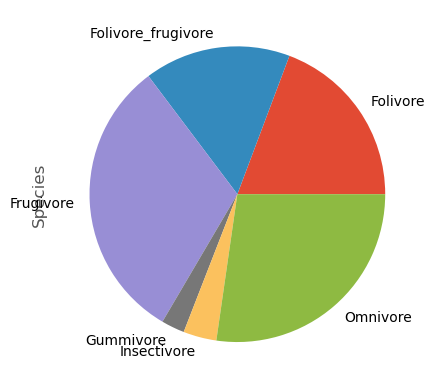

In [5]:
in_phylogeny.groupby('TrophicGuild').Species.count().plot(kind='pie')

In [6]:
in_phylogeny.loc[:, "diet"] = in_phylogeny.apply(
    lambda r: 'Herbivore' 
                if r.TrophicGuild in ["Folivore", "Folivore_frugivore", "Frugivore"]
                else 'Omnivore', 
                axis=1
            )

in_phylogeny

,index,Family,Genus,CommonName,Species,Species (ITIS),Habitat_Forest,Habitat_Savanna,Habitat_Shrubland,Habitat_Grassland,...,Habitat_Desert,Refs1,Refs2,non-forest,only-forest,In-phylogeny,non-forest_phy,only-forest_phy,TrophicGuild,diet
0,0,Cercopithecidae,Allenopithecus,Allen_s_Swamp_Monkey,Allenopithecus_nigroviridis,Allenopithecus_nigroviridis,1.0,0.0,0.0,0.0,...,0.0,227.0,NaN,1.0,0.0,1.0,1.0,0.0,Frugivore,Herbivore
1,1,Cheirogaleidae,Allocebus,Hairy_eared_Dwarf_Lemur,Allocebus_trichotis,Allocebus_trichotis,1.0,0.0,0.0,0.0,...,0.0,227.0,NaN,0.0,1.0,1.0,0.0,1.0,Omnivore,Omnivore
2,6,Atelidae,Alouatta,Red_handed_Howler,Alouatta_belzebul,Alouatta_belzebul,1.0,0.0,0.0,0.0,...,0.0,227.0,NaN,0.0,1.0,1.0,0.0,1.0,Folivore_frugivore,Herbivore
3,7,Atelidae,Alouatta,Paraguayan_Howler,Alouatta_caraya,Alouatta_caraya,1.0,1.0,0.0,0.0,...,0.0,227.0,NaN,1.0,0.0,1.0,1.0,0.0,Folivore_frugivore,Herbivore
4,9,Atelidae,Alouatta,Brown_Howler,Alouatta_guariba,Alouatta_guariba,1.0,0.0,0.0,0.0,...,0.0,227.0,NaN,0.0,1.0,1.0,0.0,1.0,Folivore_frugivore,Herbivore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,498,Cercopithecidae,Trachypithecus,Phayre_s_Langur,Trachypithecus_phayrei,Trachypithecus_phayrei,1.0,1.0,0.0,0.0,...,0.0,227.0,NaN,1.0,0.0,1.0,1.0,0.0,Folivore,Herbivore
271,499,Cercopithecidae,Trachypithecus,Capped_Langur,Trachypithecus_pileatus,Trachypithecus_pileatus,1.0,0.0,0.0,0.0,...,0.0,227.0,NaN,0.0,1.0,1.0,0.0,1.0,Folivore,Herbivore
272,500,Cercopithecidae,Trachypithecus,Cat_Ba_Langur,Trachypithecus_poliocephalus,Trachypithecus_poliocephalus,1.0,0.0,1.0,0.0,...,0.0,254.0,199.0,1.0,0.0,1.0,1.0,0.0,Folivore,Herbivore
273,502,Cercopithecidae,Trachypithecus,Shortridge_s_Langur,Trachypithecus_shortridgei,Trachypithecus_shortridgei,1.0,0.0,0.0,0.0,...,0.0,227.0,NaN,0.0,1.0,1.0,0.0,1.0,Folivore,Herbivore


In [7]:
in_phylogeny.groupby('diet').Species.count()

diet
Herbivore    183
Omnivore      92
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

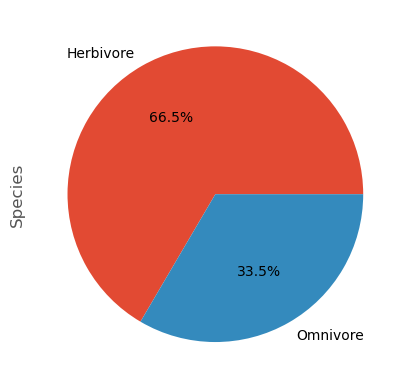

In [8]:
in_phylogeny.groupby('diet').Species.count().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:>

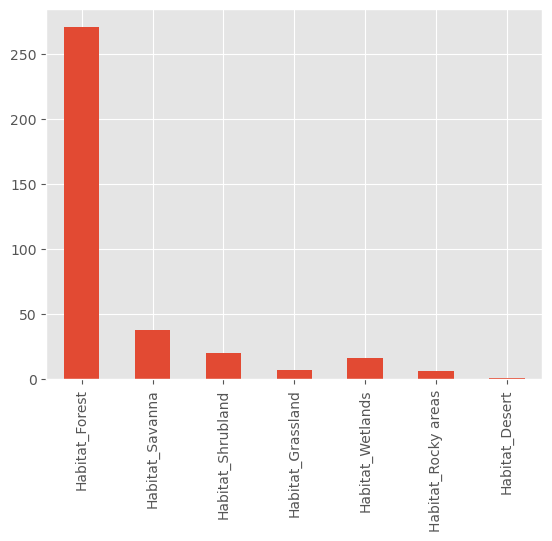

In [9]:
habitat_cols = [col for col in in_phylogeny.columns if "Habitat" in col]

in_phylogeny[habitat_cols].sum().plot(kind='bar')

In [10]:
in_phylogeny.Family.nunique()
in_phylogeny.Genus.nunique()

70

<AxesSubplot:ylabel='Species'>

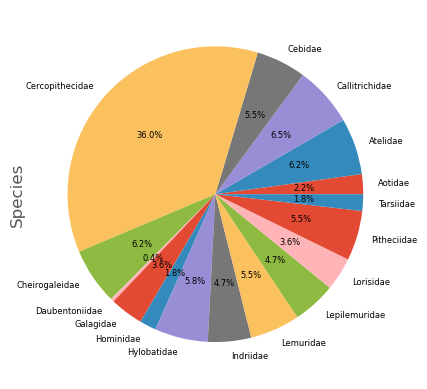

In [11]:
in_phylogeny.groupby('Family').Species.count().plot(kind='pie', autopct='%1.1f%%', fontsize=6)

<AxesSubplot:xlabel='count', ylabel='Genus'>

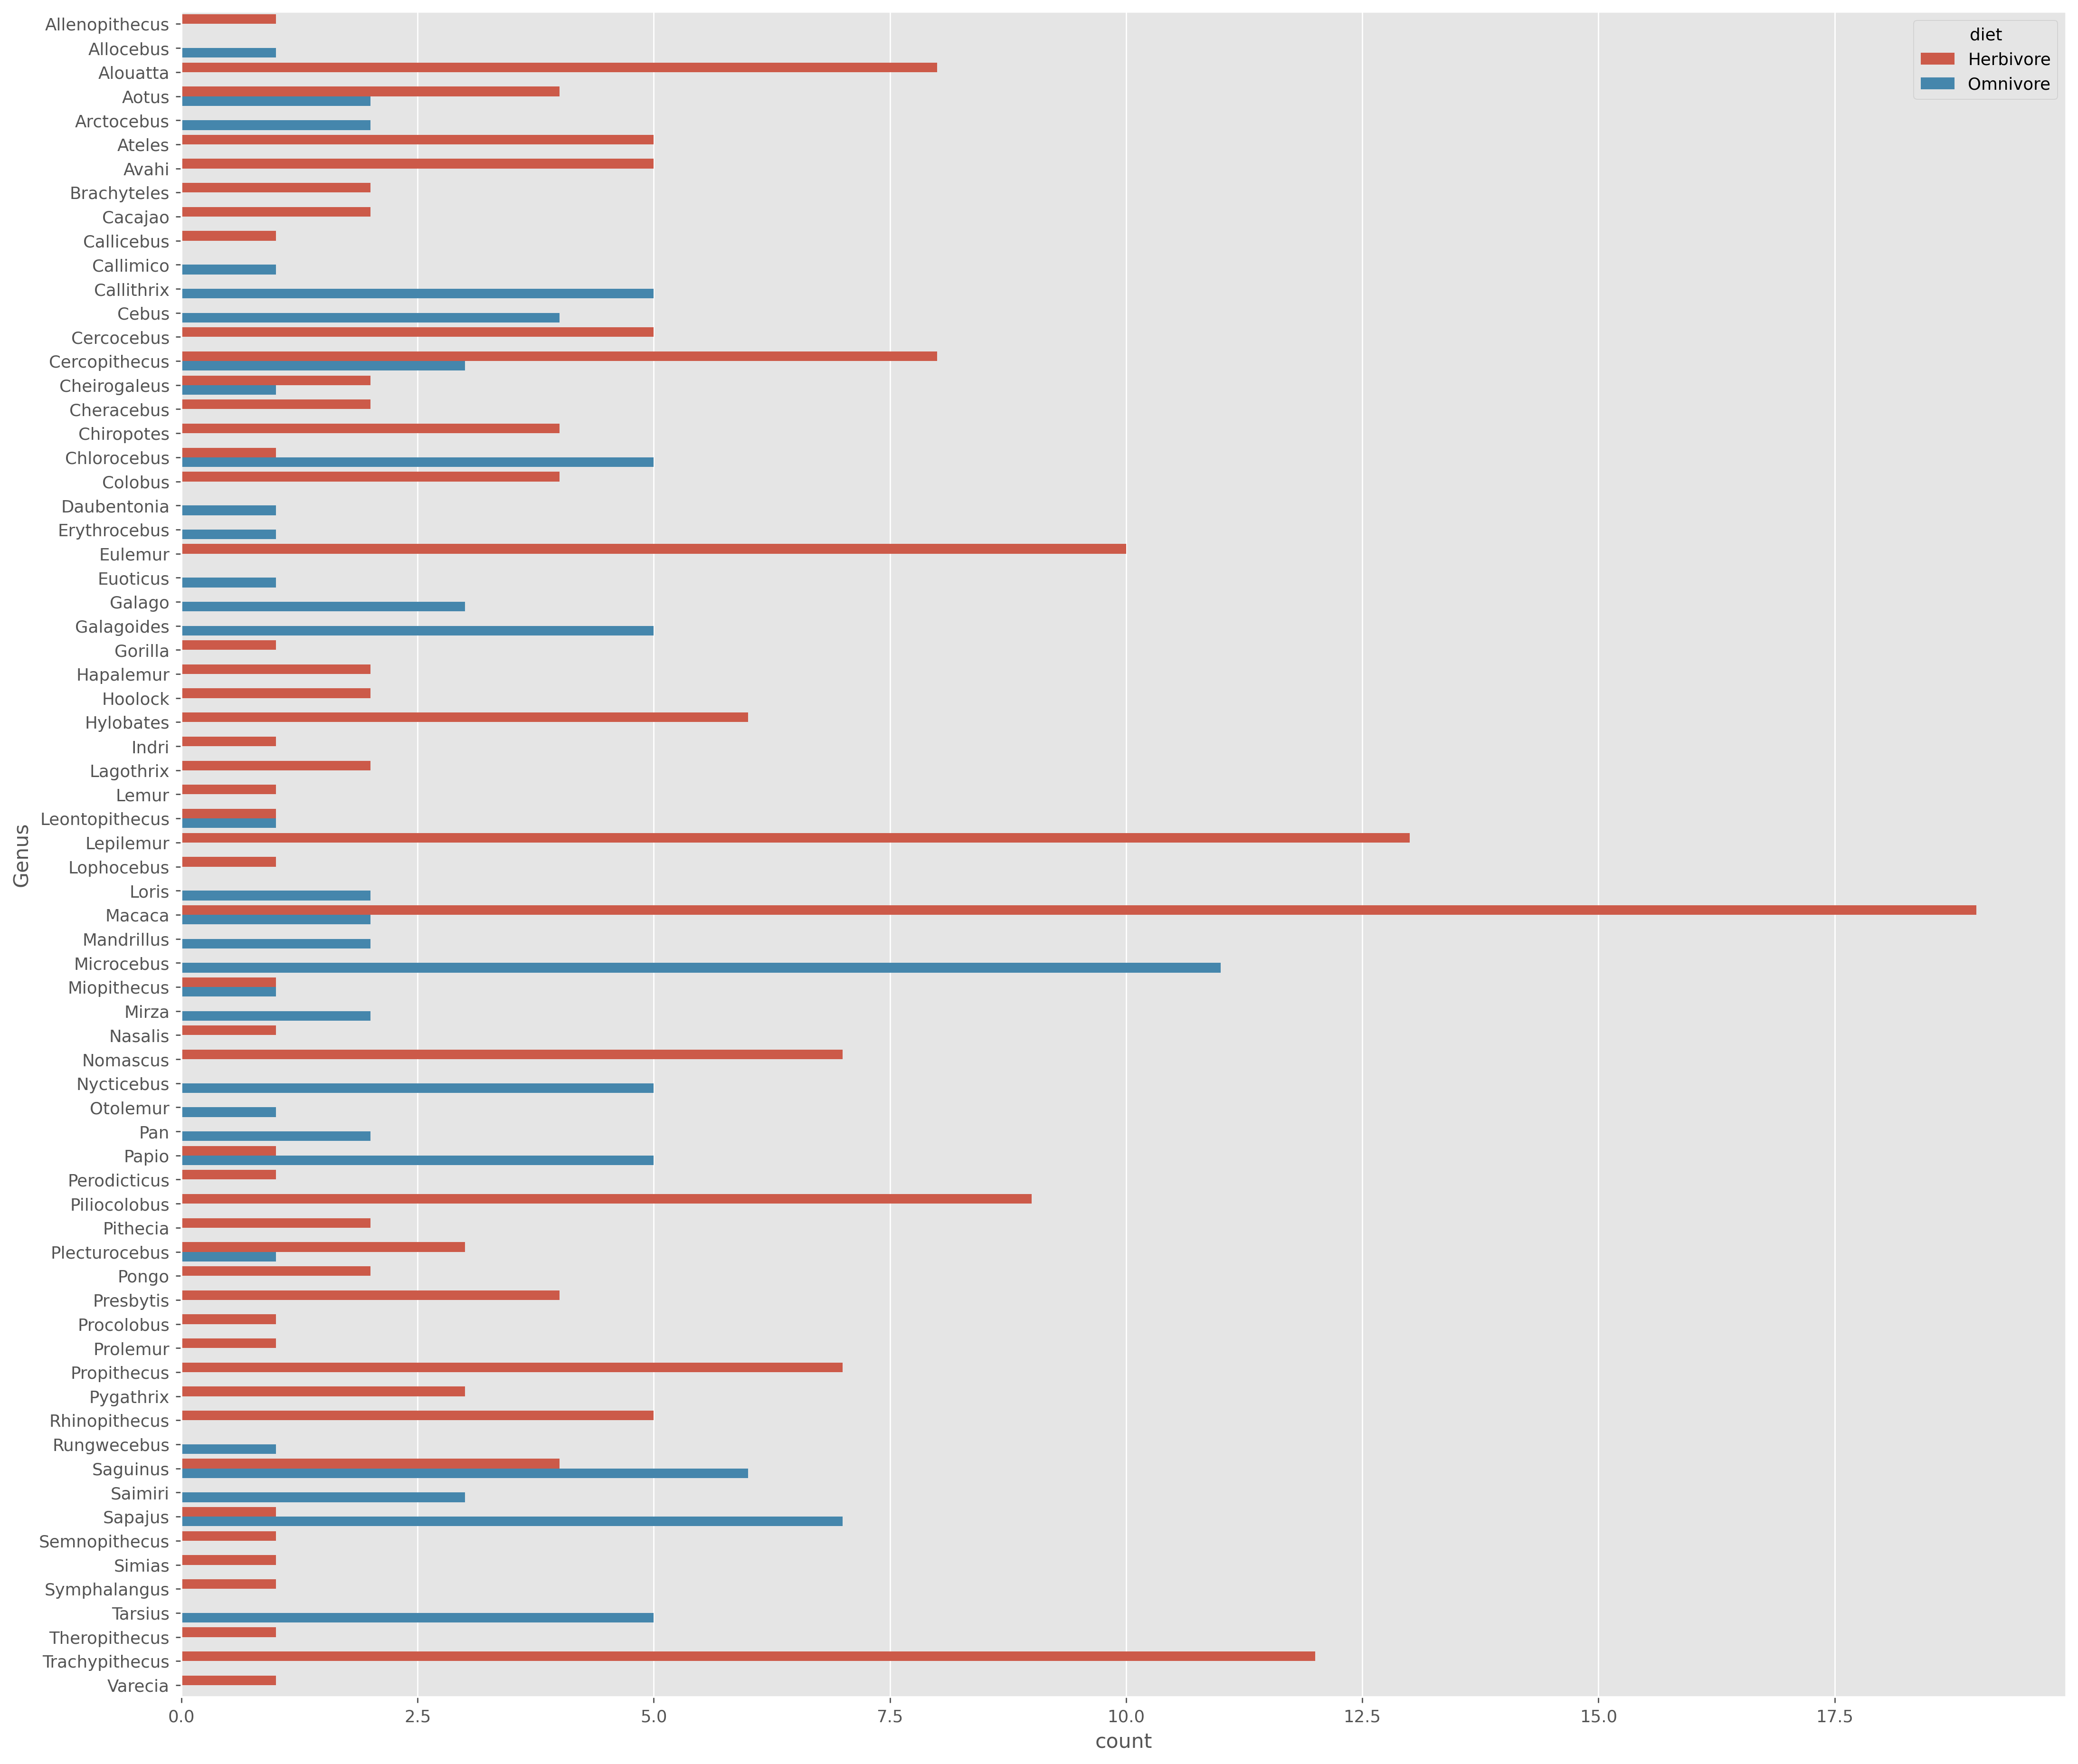

In [12]:
plt.figure(num=None, figsize=(20,18), dpi=256, facecolor='w', edgecolor='r')
sns.countplot(y='Genus', data=in_phylogeny, hue='diet')